In [1]:
# Chargement des librairies nécessaires
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)

Warning message:
"le package 'ggplot2' a été compilé avec la version R 4.2.3"
Warning message:
"le package 'tidyverse' a été compilé avec la version R 4.2.3"
Warning message:
"le package 'tibble' a été compilé avec la version R 4.2.3"
Warning message:
"le package 'tidyr' a été compilé avec la version R 4.2.3"
Warning message:
"le package 'readr' a été compilé avec la version R 4.2.3"
Warning message:
"le package 'purrr' a été compilé avec la version R 4.2.3"
Warning message:
"le package 'dplyr' a été compilé avec la version R 4.3.2"
Warning message:
"le package 'stringr' a été compilé avec la version R 4.2.3"
Warning message:
"le package 'forcats' a été compilé avec la version R 4.2.3"
Warning message:
"le package 'lubridate' a été compilé avec la version R 4.2.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ 

In [2]:
# Lecture des données
energy <- read.table("C:/Users/pauld/Desktop/Stats/Machine_learning_4A/Projet/energy.txt", sep = ",", header = TRUE)
# Premières lignes du jeu de données
head(energy)
# Vérification du contenu
summary(energy)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


    Entity               Year      Access.to.electricity....of.population.
 Length:3649        Min.   :2000   Min.   :  1.252                        
 Class :character   1st Qu.:2005   1st Qu.: 59.801                        
 Mode  :character   Median :2010   Median : 98.362                        
                    Mean   :2010   Mean   : 78.934                        
                    3rd Qu.:2015   3rd Qu.:100.000                        
                    Max.   :2020   Max.   :100.000                        
                                   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [3]:
# Conversion de la variable Year en facteur
energy$Year <- as.factor(energy$Year)
# Conversion de la variable Density en variable numérique
energy$Density.n.P.Km2. <- as.numeric(gsub(",", ".", energy$Density.n.P.Km2.))
head(energy)
summary(energy)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


    Entity               Year      Access.to.electricity....of.population.
 Length:3649        2013   : 175   Min.   :  1.252                        
 Class :character   2014   : 175   1st Qu.: 59.801                        
 Mode  :character   2015   : 175   Median : 98.362                        
                    2016   : 175   Mean   : 78.934                        
                    2017   : 175   3rd Qu.:100.000                        
                    2018   : 175   Max.   :100.000                        
                    (Other):2599   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [4]:
missing_data <- colMeans(is.na(energy))*100
# Afficher les résultats
print(missing_data)
# Suppression de la varible Renewable.electricity.generating.capacity.per.capita
energy <- subset(energy, select = -Renewable.electricity.generating.capacity.per.capita)
# Suppression de la variable Financial.flows.to.developing.countries..US...
energy <- subset(energy, select = -Financial.flows.to.developing.countries..US...)
# Suppression de la variable Renewables....equivalent.primary.energy.
energy <- subset(energy, select =  -Renewables....equivalent.primary.energy.)
head(energy)

                                                          Entity 
                                                      0.00000000 
                                                            Year 
                                                      0.00000000 
                         Access.to.electricity....of.population. 
                                                      0.27404768 
                               Access.to.clean.fuels.for.cooking 
                                                      4.63140586 
            Renewable.electricity.generating.capacity.per.capita 
                                                     25.51383941 
                  Financial.flows.to.developing.countries..US... 
                                                     57.24856125 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
                                                      5.31652508 
                             Electricity.from.fossil.fuels..TWh. 
          

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,44.99,0.16,0,0.31,65.95744,302.5948,1.64,760,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,45.60,0.09,0,0.50,84.74577,236.8919,1.74,730,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,37.83,0.13,0,0.56,81.15942,210.8622,1.40,1030,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,36.66,0.31,0,0.63,67.02128,229.9682,1.40,1220,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,44.24,0.33,0,0.56,62.92135,204.2312,1.20,1030,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,33.88,0.34,0,0.59,63.44086,252.0691,1.41,1550,11.229715,242.0313,60,652230,33.93911,67.70995


In [5]:
energy <- na.omit(energy)
str(energy)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access.to.electricity....of.population.                         : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access.to.clean.fuels.for.cooking                               : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low.carbon.electricity....e

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidt

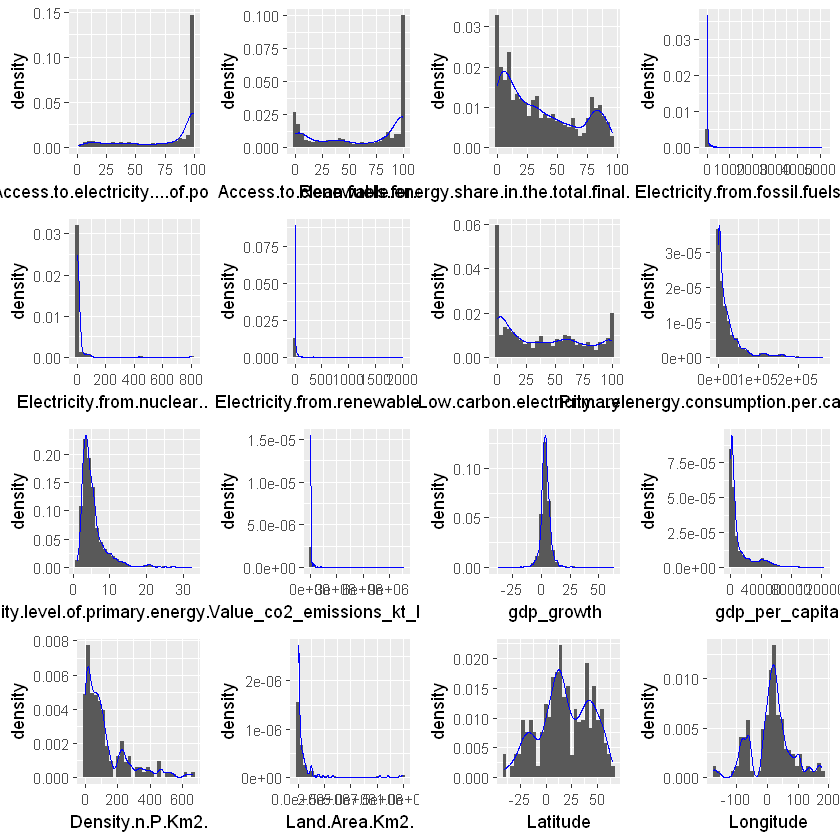

In [6]:
## que des variables quantitatives mis à part Entity et Year

g1<-ggplot(energy,aes(x=Access.to.electricity....of.population.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(energy,aes(x=Access.to.clean.fuels.for.cooking))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(energy,aes(x=Renewable.energy.share.in.the.total.final.energy.consumption....))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(energy,aes(x=Electricity.from.fossil.fuels..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(energy,aes(x=Electricity.from.nuclear..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(energy,aes(x=Electricity.from.renewables..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(energy,aes(x=Low.carbon.electricity....electricity.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(energy,aes(x=Primary.energy.consumption.per.capita..kWh.person.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g9<-ggplot(energy,aes(x=Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g10<-ggplot(energy,aes(x=Value_co2_emissions_kt_by_country))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g11<-ggplot(energy,aes(x=gdp_growth))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g12<-ggplot(energy,aes(x=gdp_per_capita))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g13<-ggplot(energy,aes(x=Density.n.P.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g14<-ggplot(energy,aes(x=Land.Area.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g15<-ggplot(energy,aes(x=Latitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g16<-ggplot(energy,aes(x=Longitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,ncol=4)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16)

In [7]:
energy[, "Access.to.electricity....of.population."] <- sqrt(energy[, "Access.to.electricity....of.population."])
energy[, "Access.to.clean.fuels.for.cooking"] <- sqrt(energy[, "Access.to.clean.fuels.for.cooking"])
energy[, "Renewable.energy.share.in.the.total.final.energy.consumption...."] <- sqrt(energy[, "Renewable.energy.share.in.the.total.final.energy.consumption...."])
energy[, "Electricity.from.fossil.fuels..TWh."] <- sqrt(energy[, "Electricity.from.fossil.fuels..TWh."])
energy[, "Electricity.from.nuclear..TWh."] <- sqrt(energy[, "Electricity.from.nuclear..TWh."])
energy[, "Electricity.from.renewables..TWh."] <- sqrt(energy[, "Electricity.from.renewables..TWh."])
energy[, "Low.carbon.electricity....electricity."] <- sqrt(energy[, "Low.carbon.electricity....electricity."])
energy[, "Primary.energy.consumption.per.capita..kWh.person."] <- log(energy[, "Primary.energy.consumption.per.capita..kWh.person."])
energy[, "Value_co2_emissions_kt_by_country"] <- log(energy[, "Value_co2_emissions_kt_by_country"])
energy[, "gdp_per_capita"] <- log(energy[, "gdp_per_capita"])
energy[, "Density.n.P.Km2."] <- log(energy[, "Density.n.P.Km2."])
energy[, "Land.Area.Km2."] <- log(energy[, "Land.Area.Km2."]) ### si je fais log pour electricity et pas sqrt, j'ai des pb lors de l'acp

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

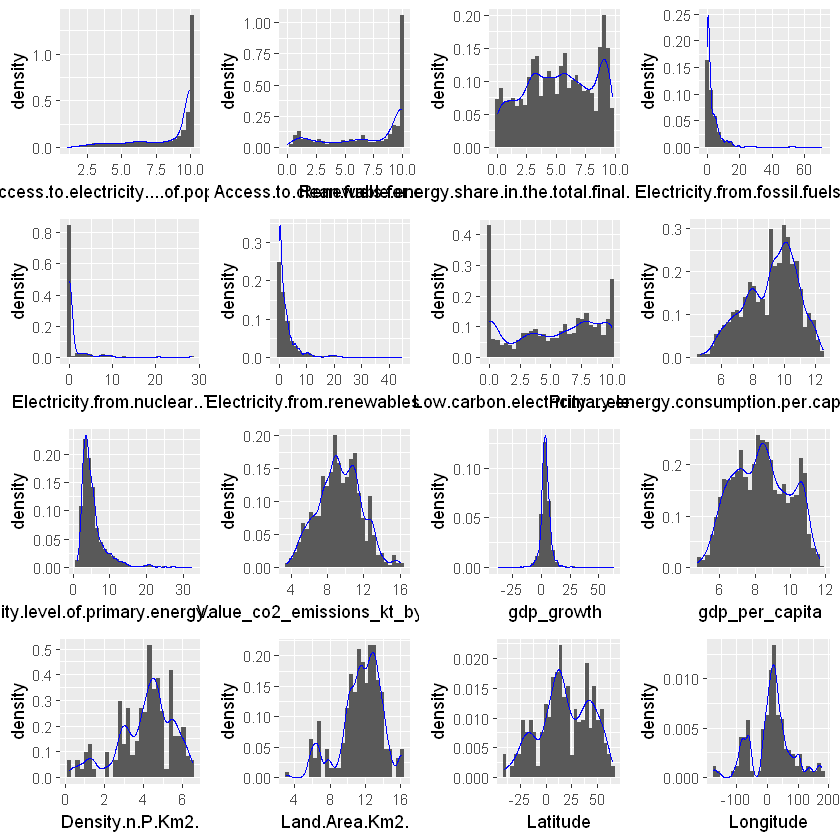

In [8]:
g1<-ggplot(energy,aes(x=Access.to.electricity....of.population.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(energy,aes(x=Access.to.clean.fuels.for.cooking))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(energy,aes(x=Renewable.energy.share.in.the.total.final.energy.consumption....))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(energy,aes(x=Electricity.from.fossil.fuels..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(energy,aes(x=Electricity.from.nuclear..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(energy,aes(x=Electricity.from.renewables..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(energy,aes(x=Low.carbon.electricity....electricity.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(energy,aes(x=Primary.energy.consumption.per.capita..kWh.person.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g9<-ggplot(energy,aes(x=Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g10<-ggplot(energy,aes(x=Value_co2_emissions_kt_by_country))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g11<-ggplot(energy,aes(x=gdp_growth))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g12<-ggplot(energy,aes(x=gdp_per_capita))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g13<-ggplot(energy,aes(x=Density.n.P.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g14<-ggplot(energy,aes(x=Land.Area.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g15<-ggplot(energy,aes(x=Latitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g16<-ggplot(energy,aes(x=Longitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,ncol=4)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16)

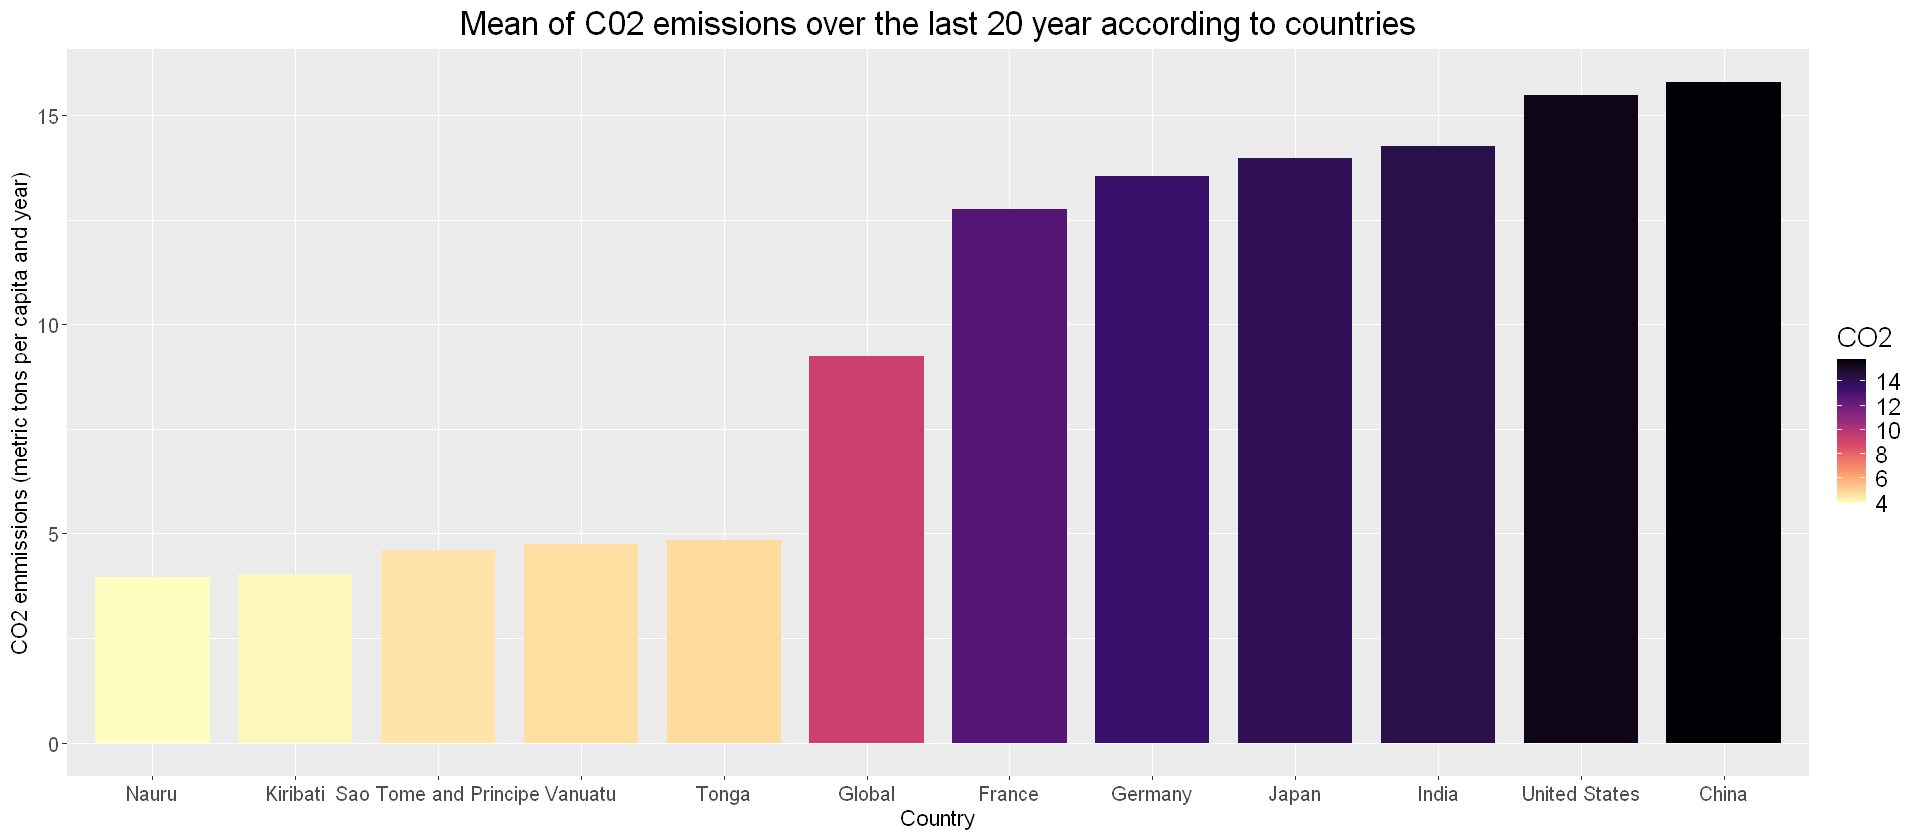

In [58]:
options(repr.plot.width = 16)
df <- energy$Value_co2_emissions_kt_by_country
df <-  matrix(df, nrow = 2868)
df <- as.data.frame(df)
colnames(df) = list("CO2")
df$Country <- energy$Entity
df_mean <- summarise(group_by(df, Country), mean_value = mean(CO2))
CO2 <- df_mean$mean_value
Country <- df_mean$Country
df <- data.frame(Country = Country, CO2 = CO2)
fr <- df[48,] ## france
df <- arrange(df, desc(CO2))
top_5 <- head(df, 5)
last_5 <- tail(df,5)
moyenne <- mean(df$CO2)
mean <- data.frame("Country" = "Global", "CO2" = moyenne)
df <- rbind(top_5, fr)
df <- rbind(df,mean)
df <- rbind(df,last_5)
ggplot(df, aes(x=reorder(Country, CO2), y=CO2, fill=CO2)) +
  geom_bar(stat = "identity", position = "stack", width = 0.8) +
  labs(title = "Mean of C02 emissions over the last 20 year according to countries", x = "Country", y = "CO2 emmissions (metric tons per capita and year)") +
  theme(plot.title = element_text(size = 20, hjust = 0.5), 
        axis.text.y = element_text(size = 12),
        axis.title.y = element_text(size = 13),
        axis.text.x = element_text(size = 12),
       axis.title.x = element_text(size = 13),
       legend.text = element_text(size = 14),  # Ajuster la taille du texte de la légende
       legend.title = element_text(size = 16),  # Ajuster la taille du titre de la légende
       legend.position = "right") + 
       scale_fill_viridis_c(option = "A", direction = -1)

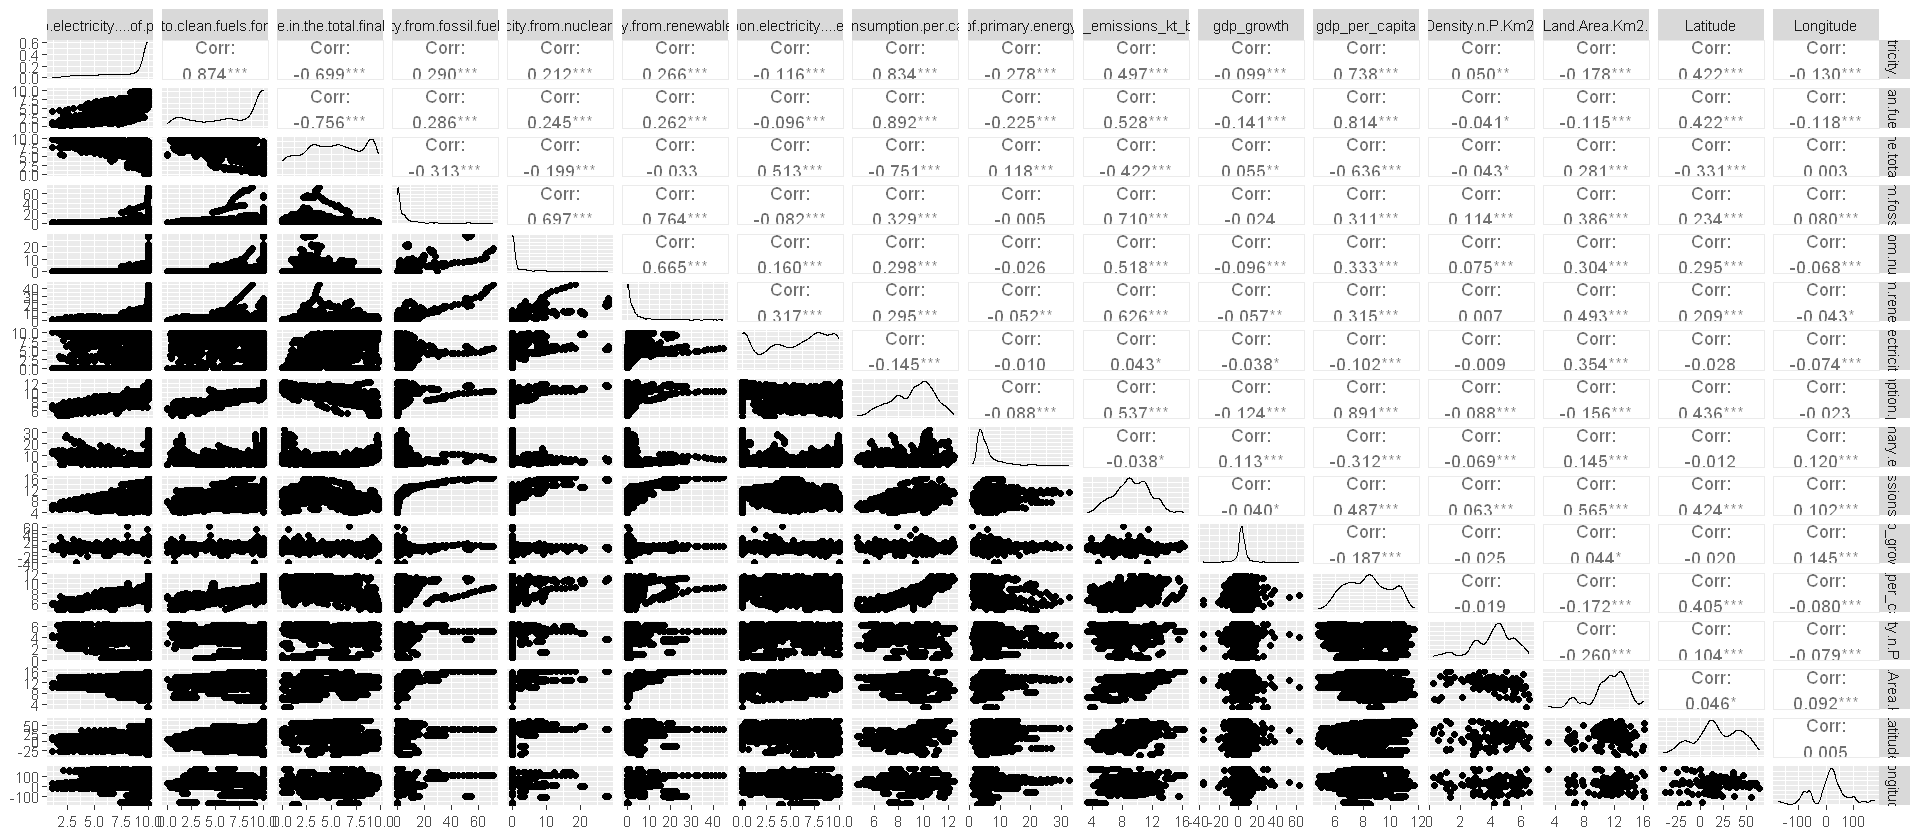

In [59]:
ggpairs(energy[, c(3:18)])

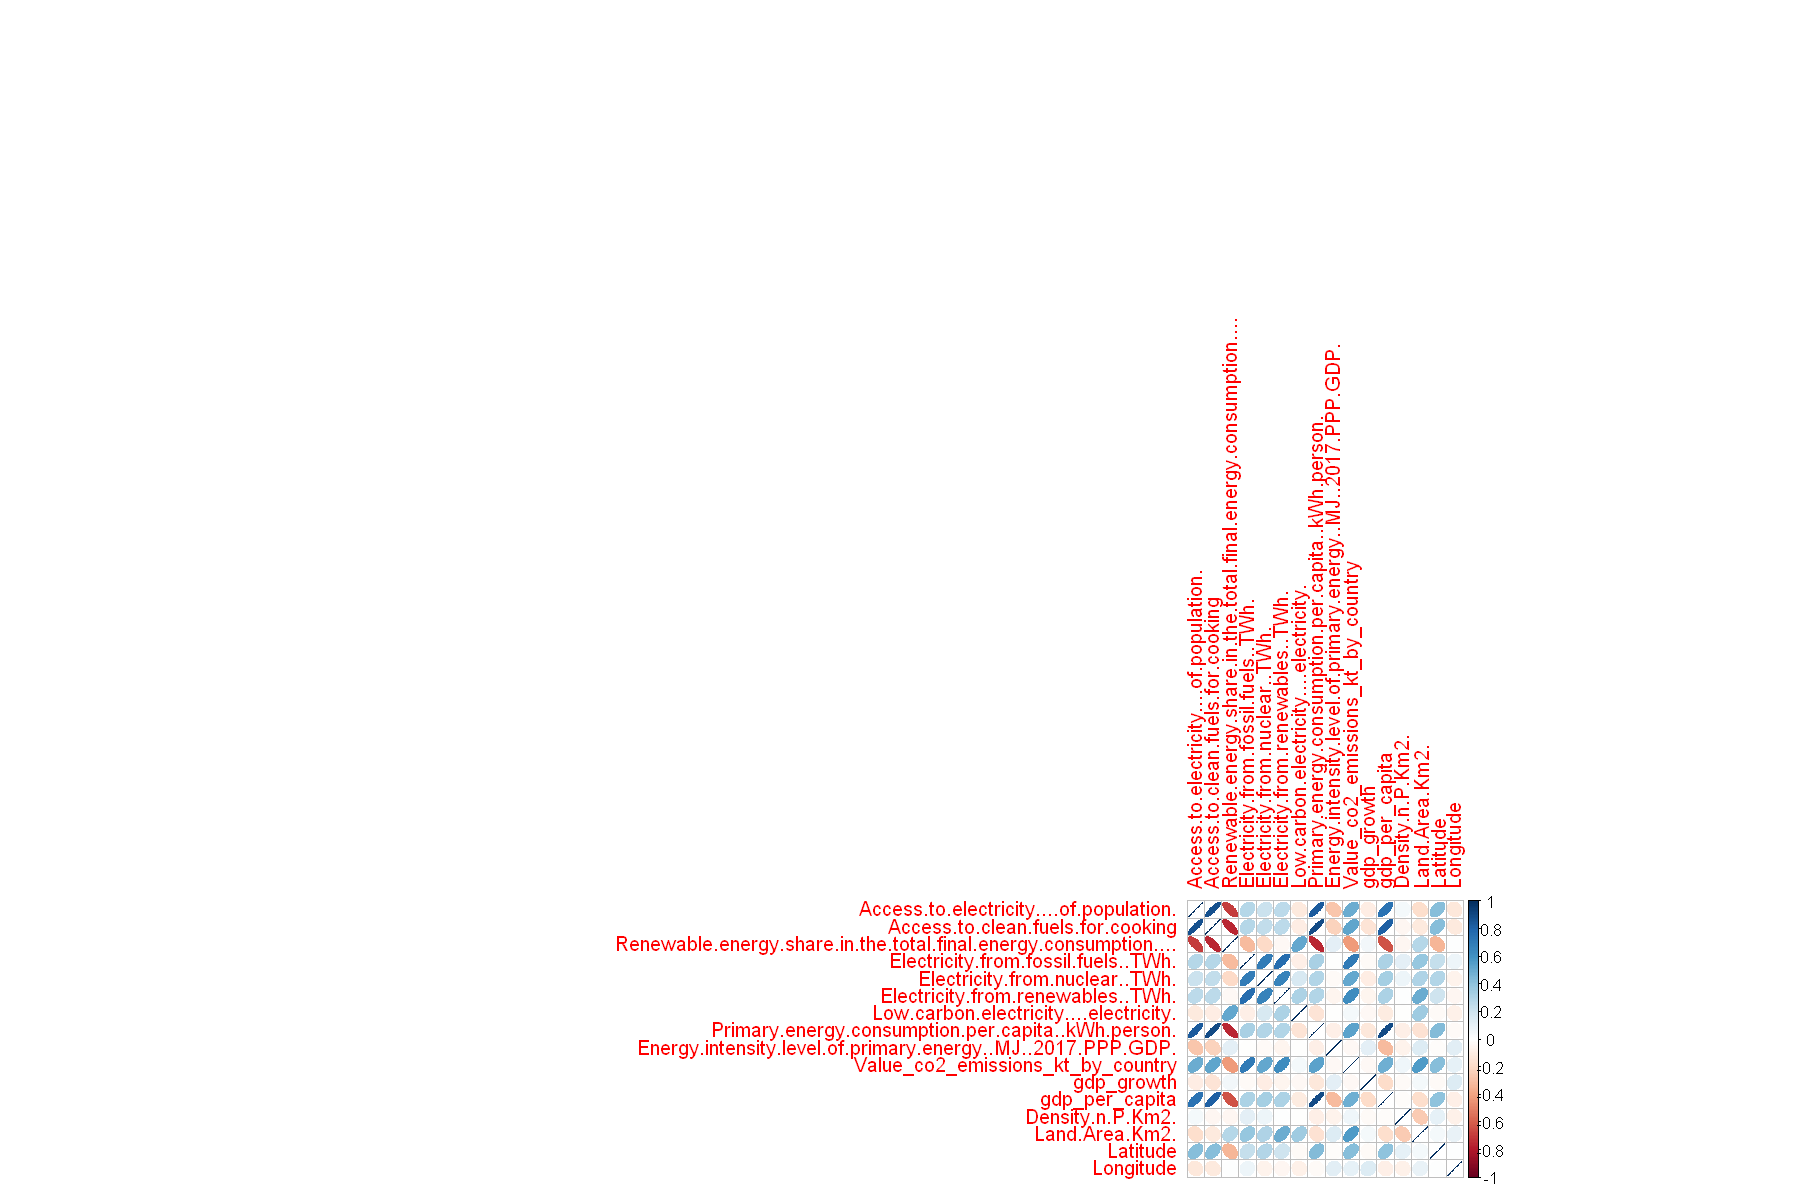

In [496]:
library(corrplot)
corrplot(cor(energy[, c(3:18)]),method="ellipse")

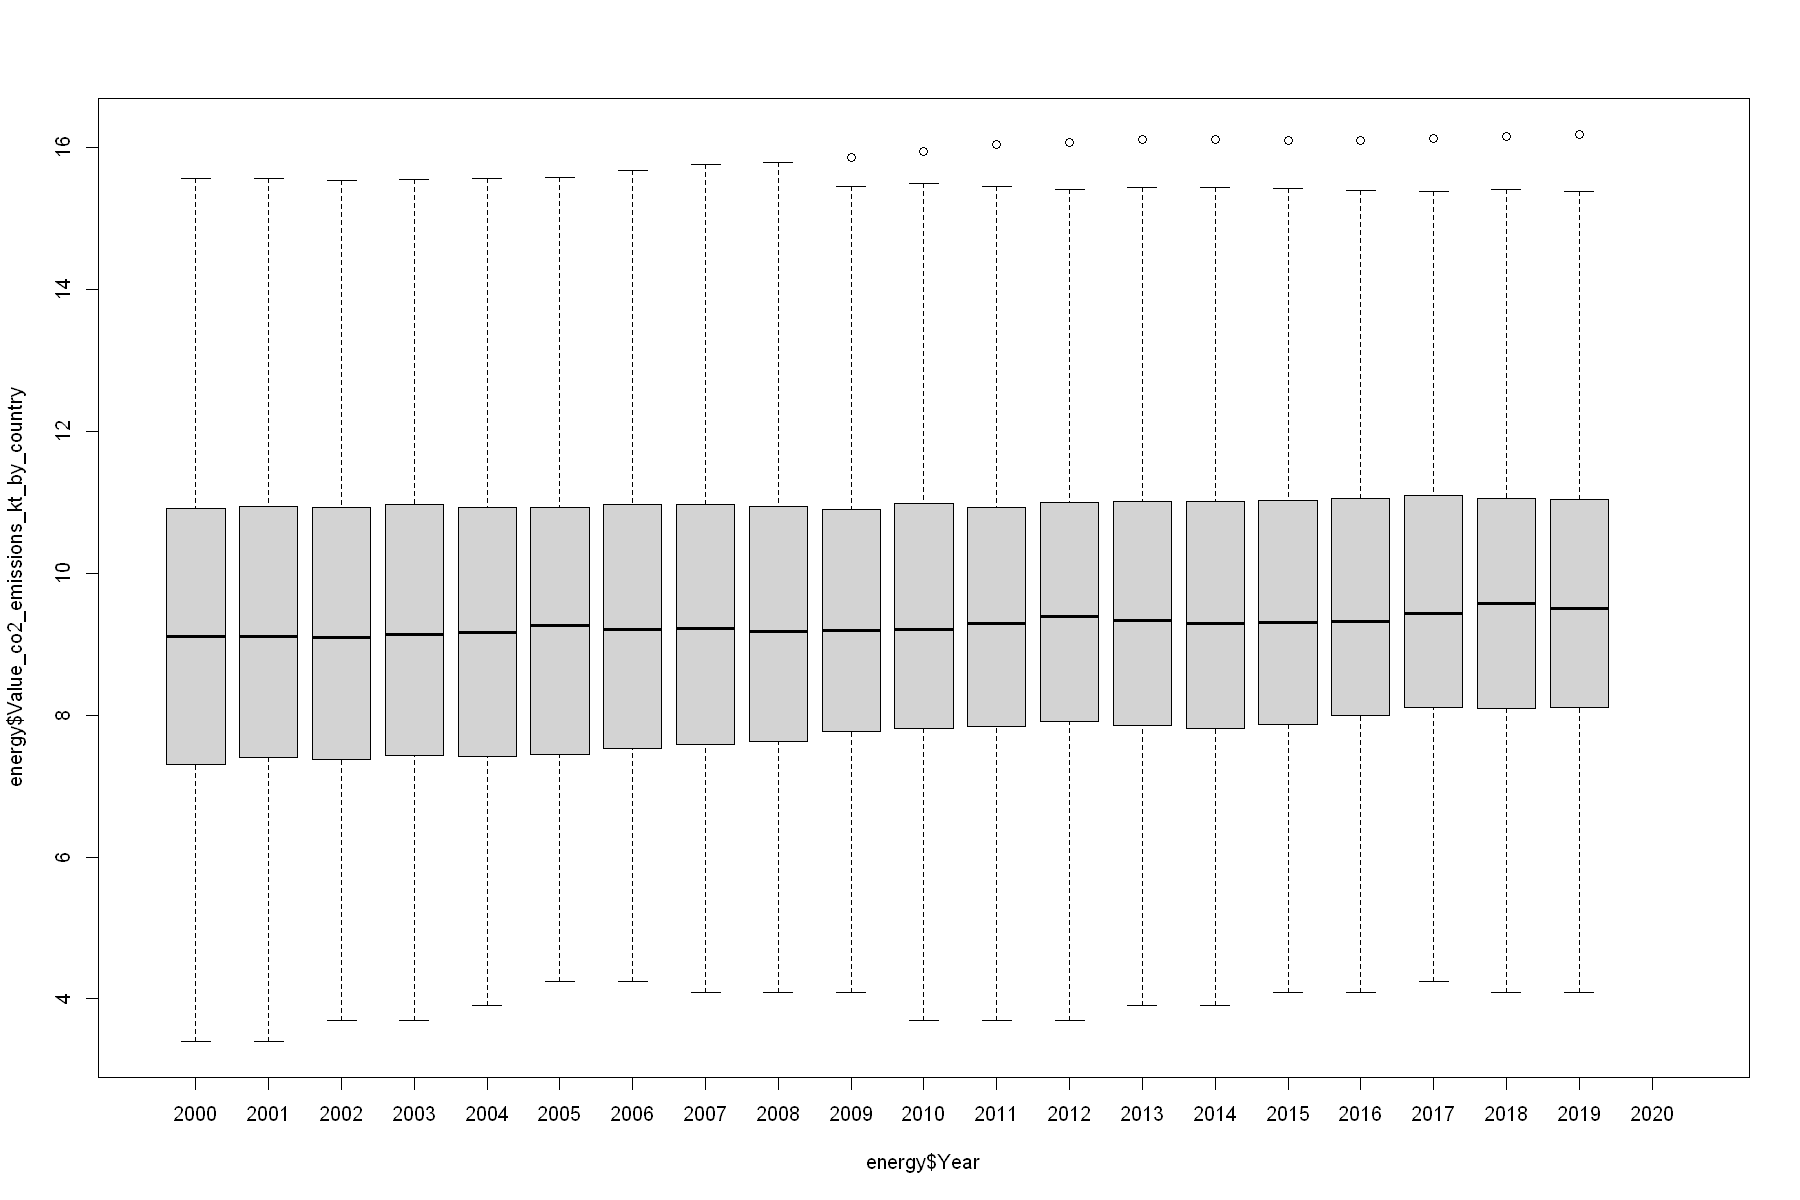

In [465]:
boxplot(energy$Value_co2_emissions_kt_by_country ~ energy$Year, data=energy)

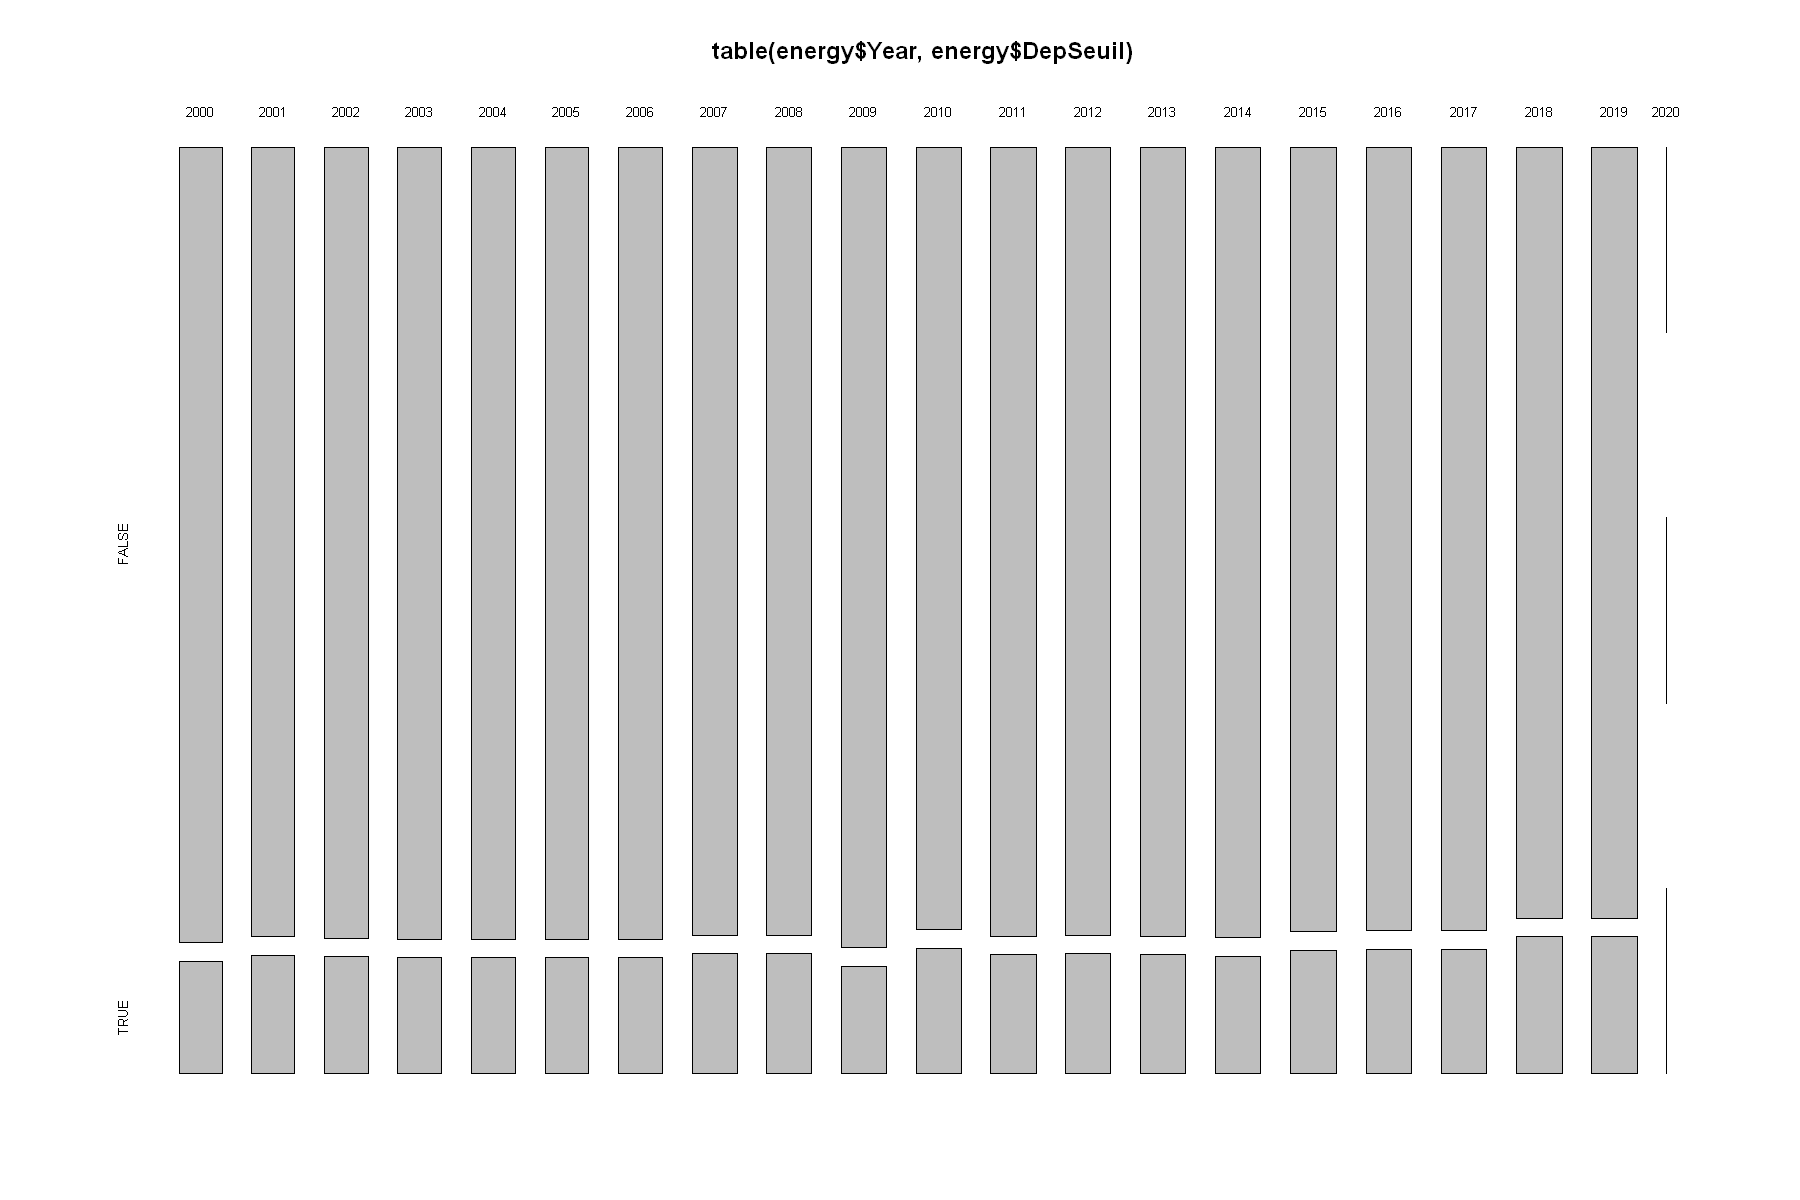

In [497]:
### O3obs en fonction des variables qualitatives
energy[, "DepSeuil"] <- as.factor(energy[, "Value_co2_emissions_kt_by_country"] > 12)
mosaicplot(table(energy$Year,energy$DepSeuil))

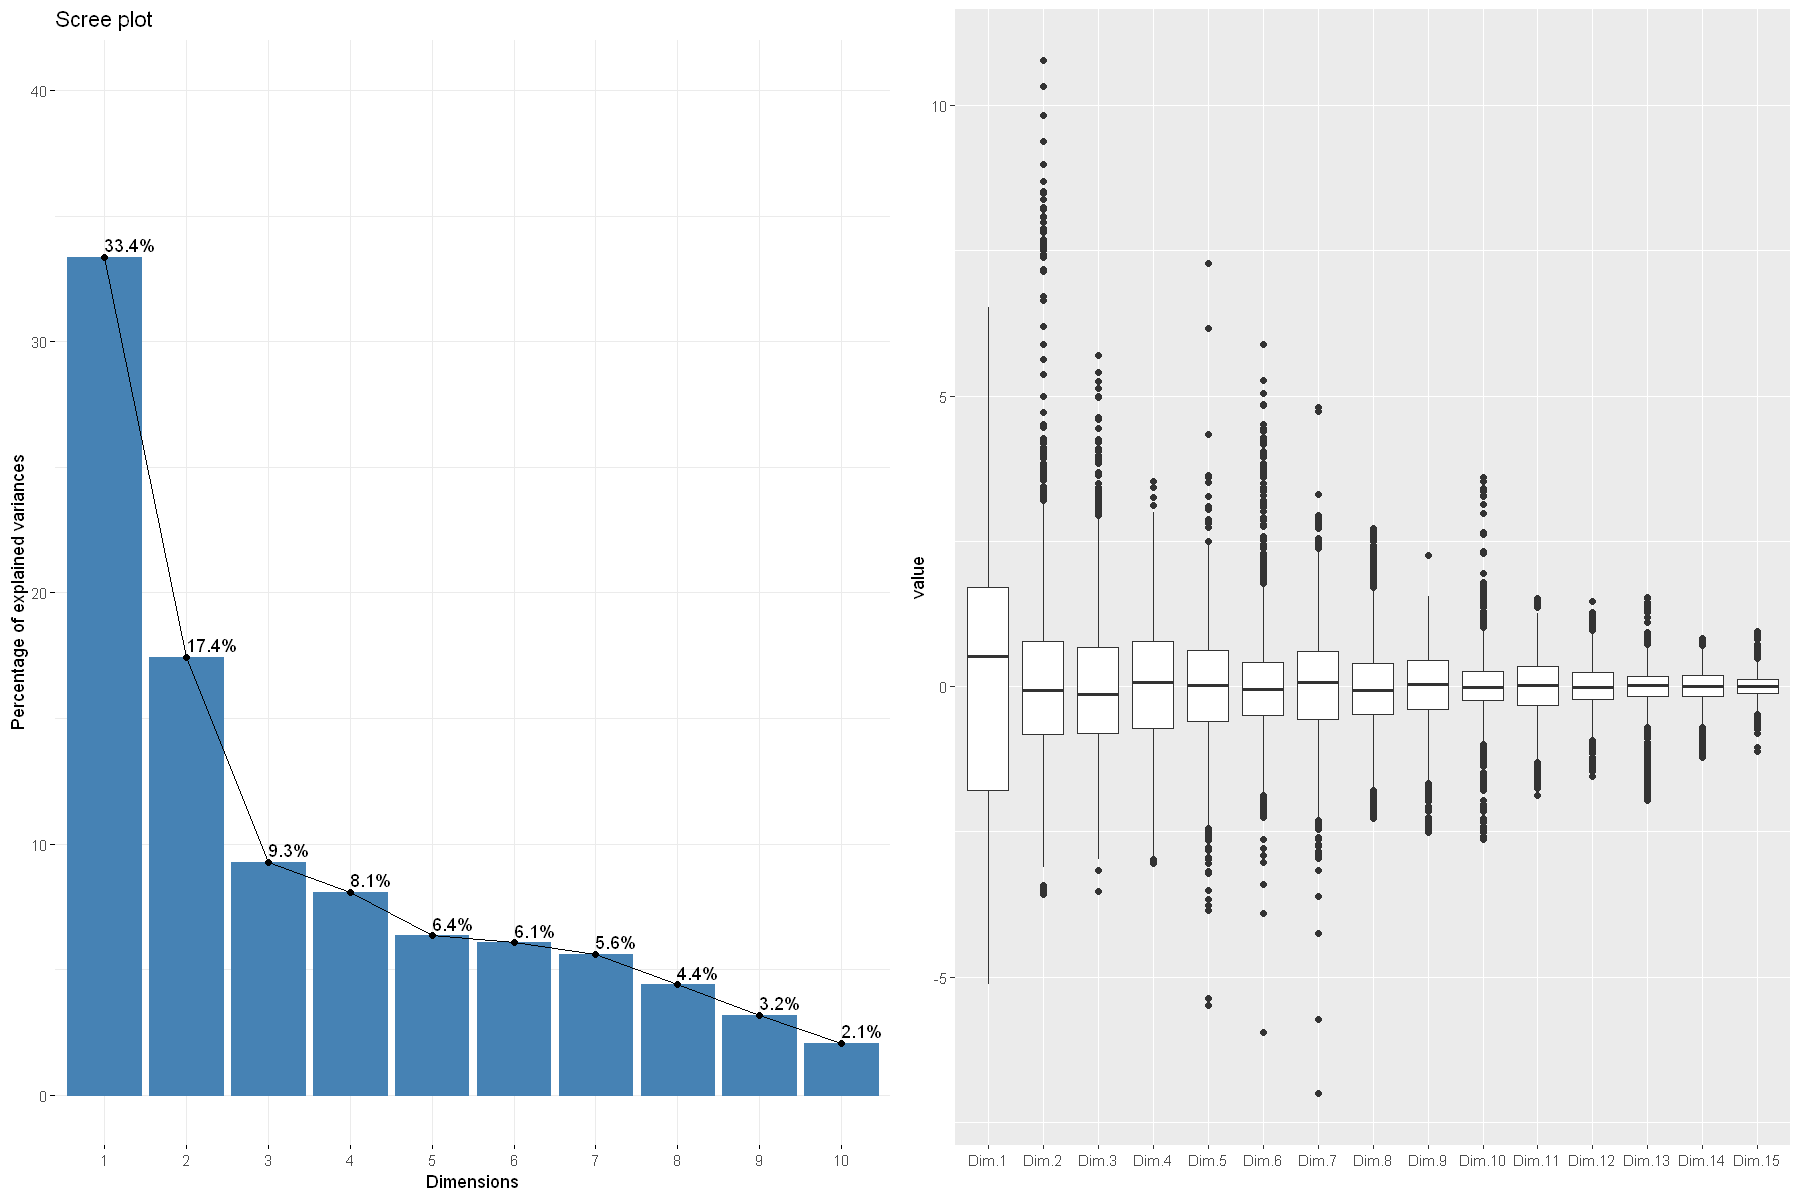

In [499]:
library(FactoMineR)

acp <- PCA(energy[, c(19,12,3:11,13:18)], scale.unit = TRUE,
           graph = FALSE, quali.sup = 1, quanti.sup = 2, ncp = 15)
# Décroissance des valeurs propres
library(factoextra)
g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

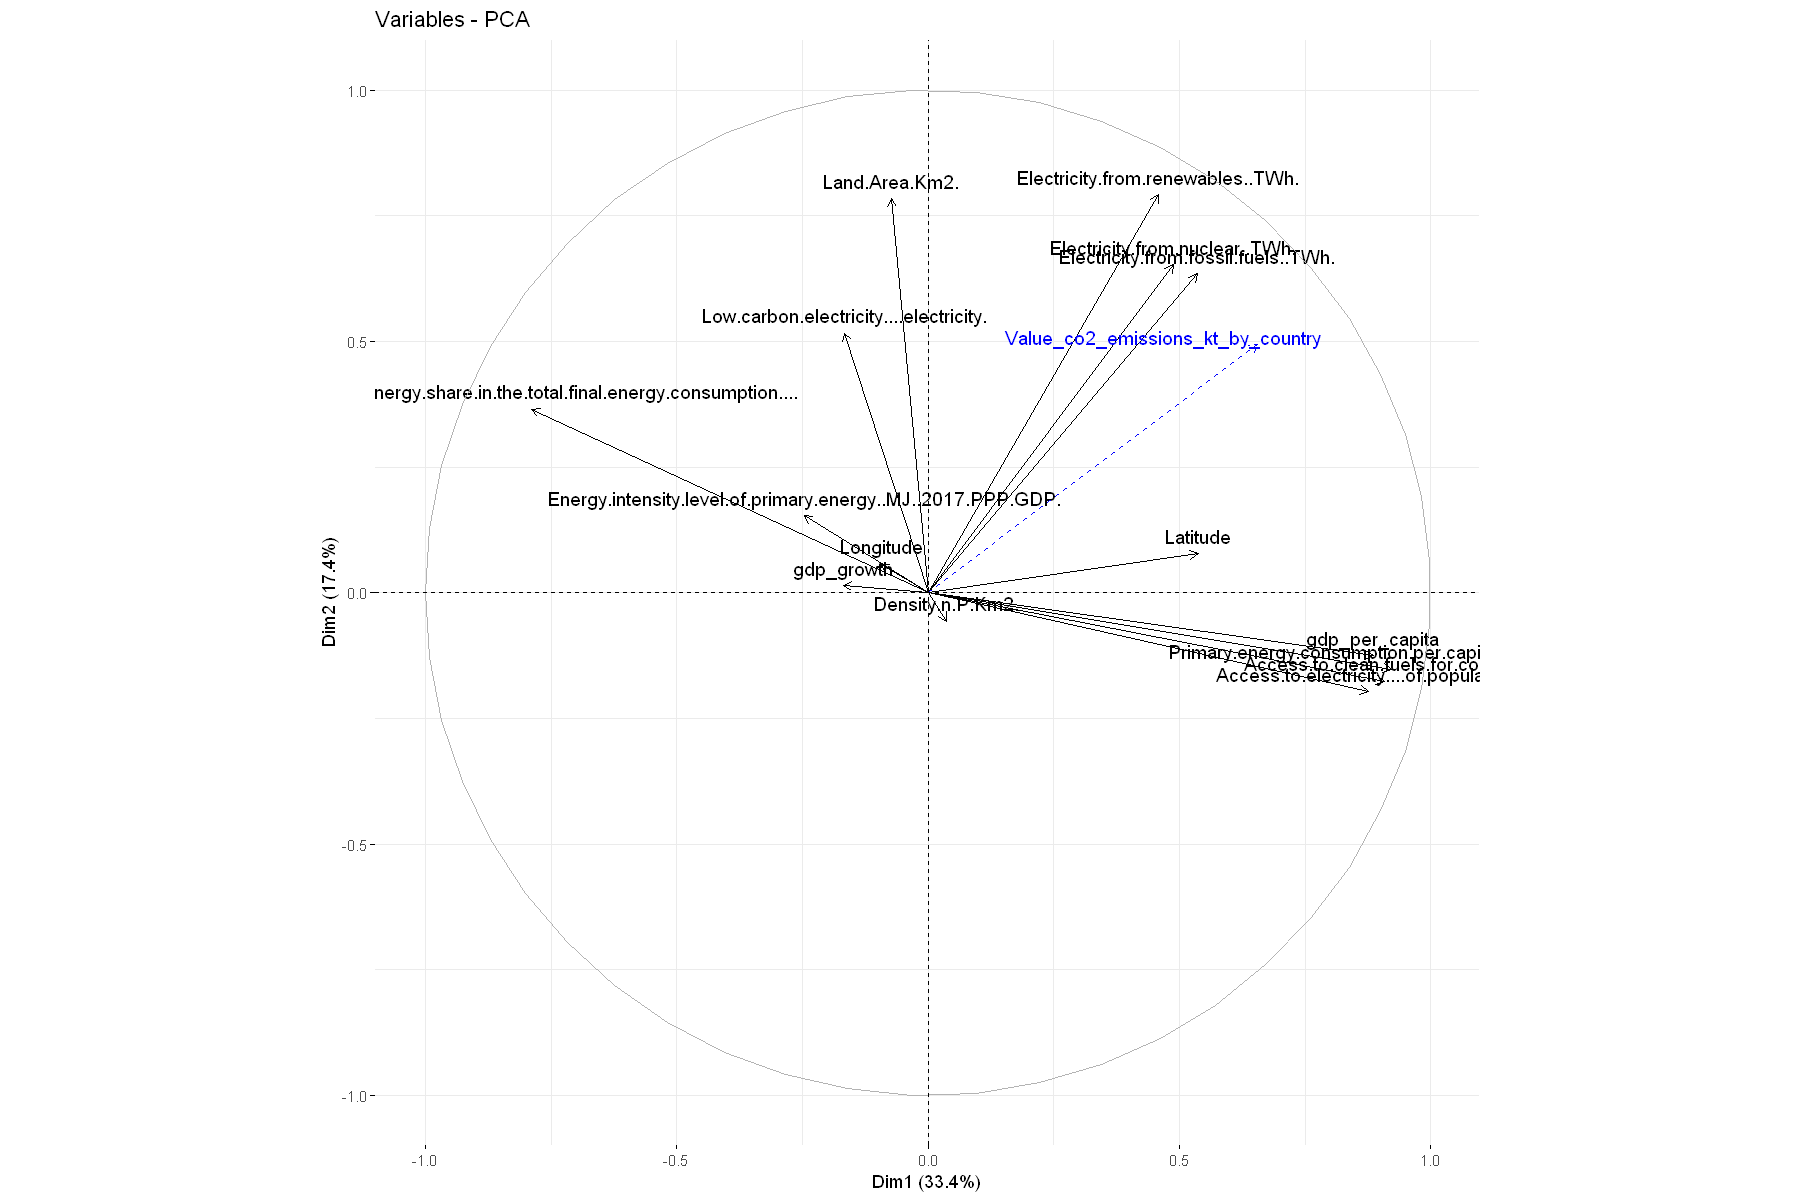

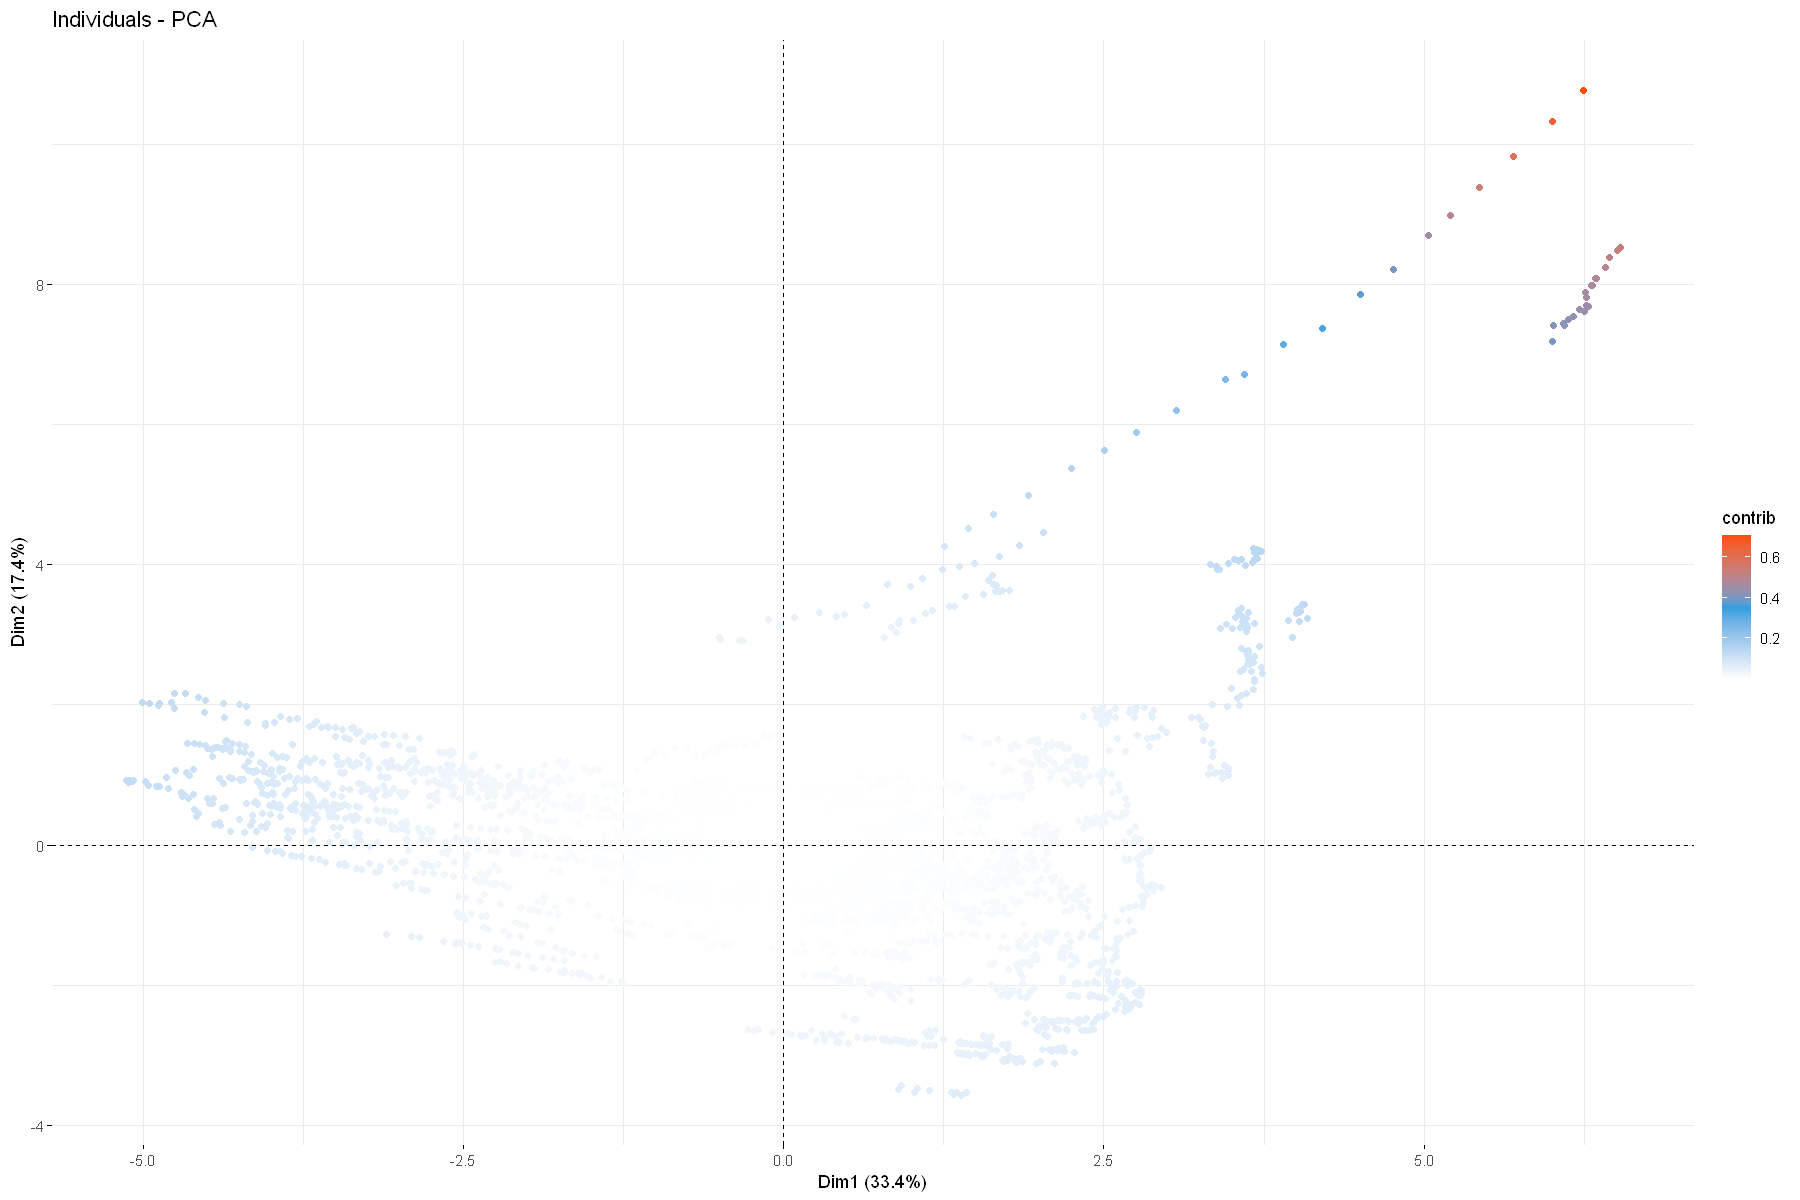

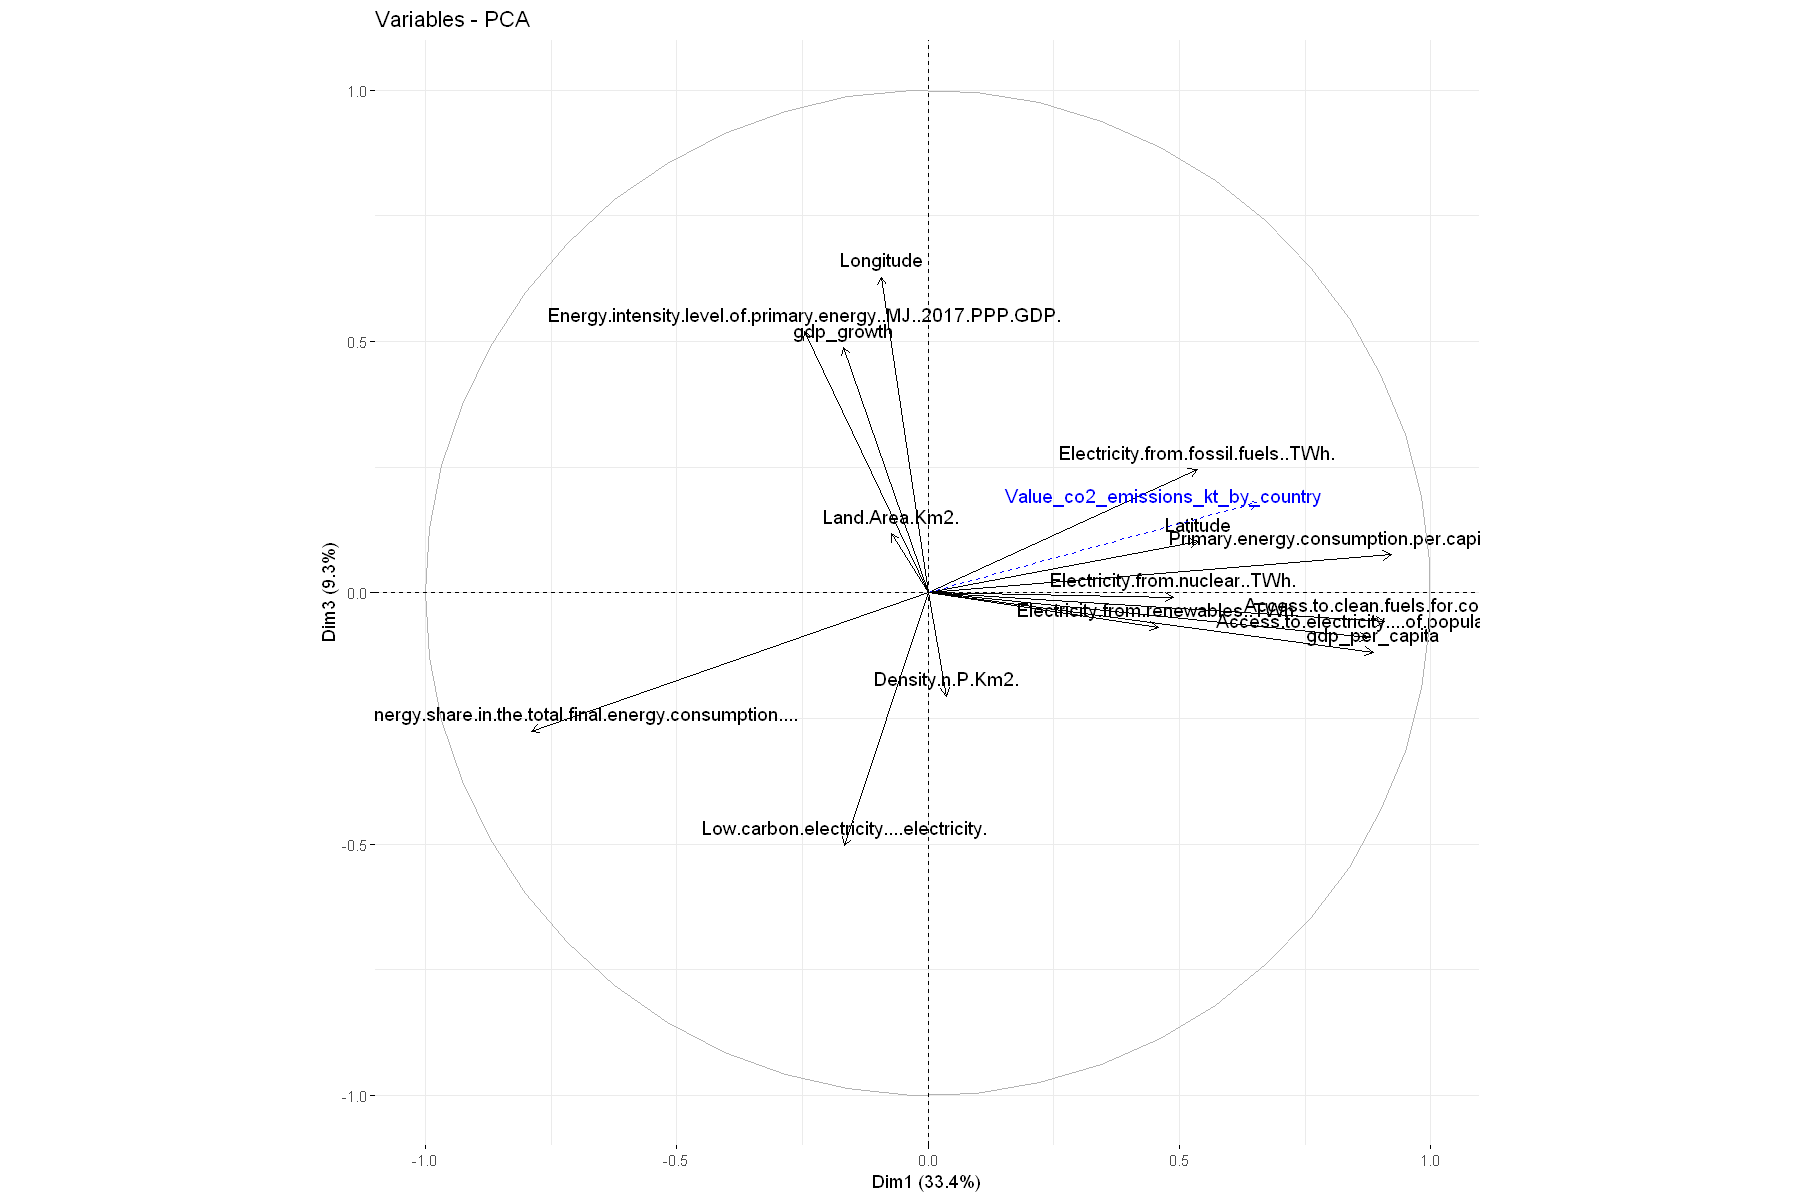

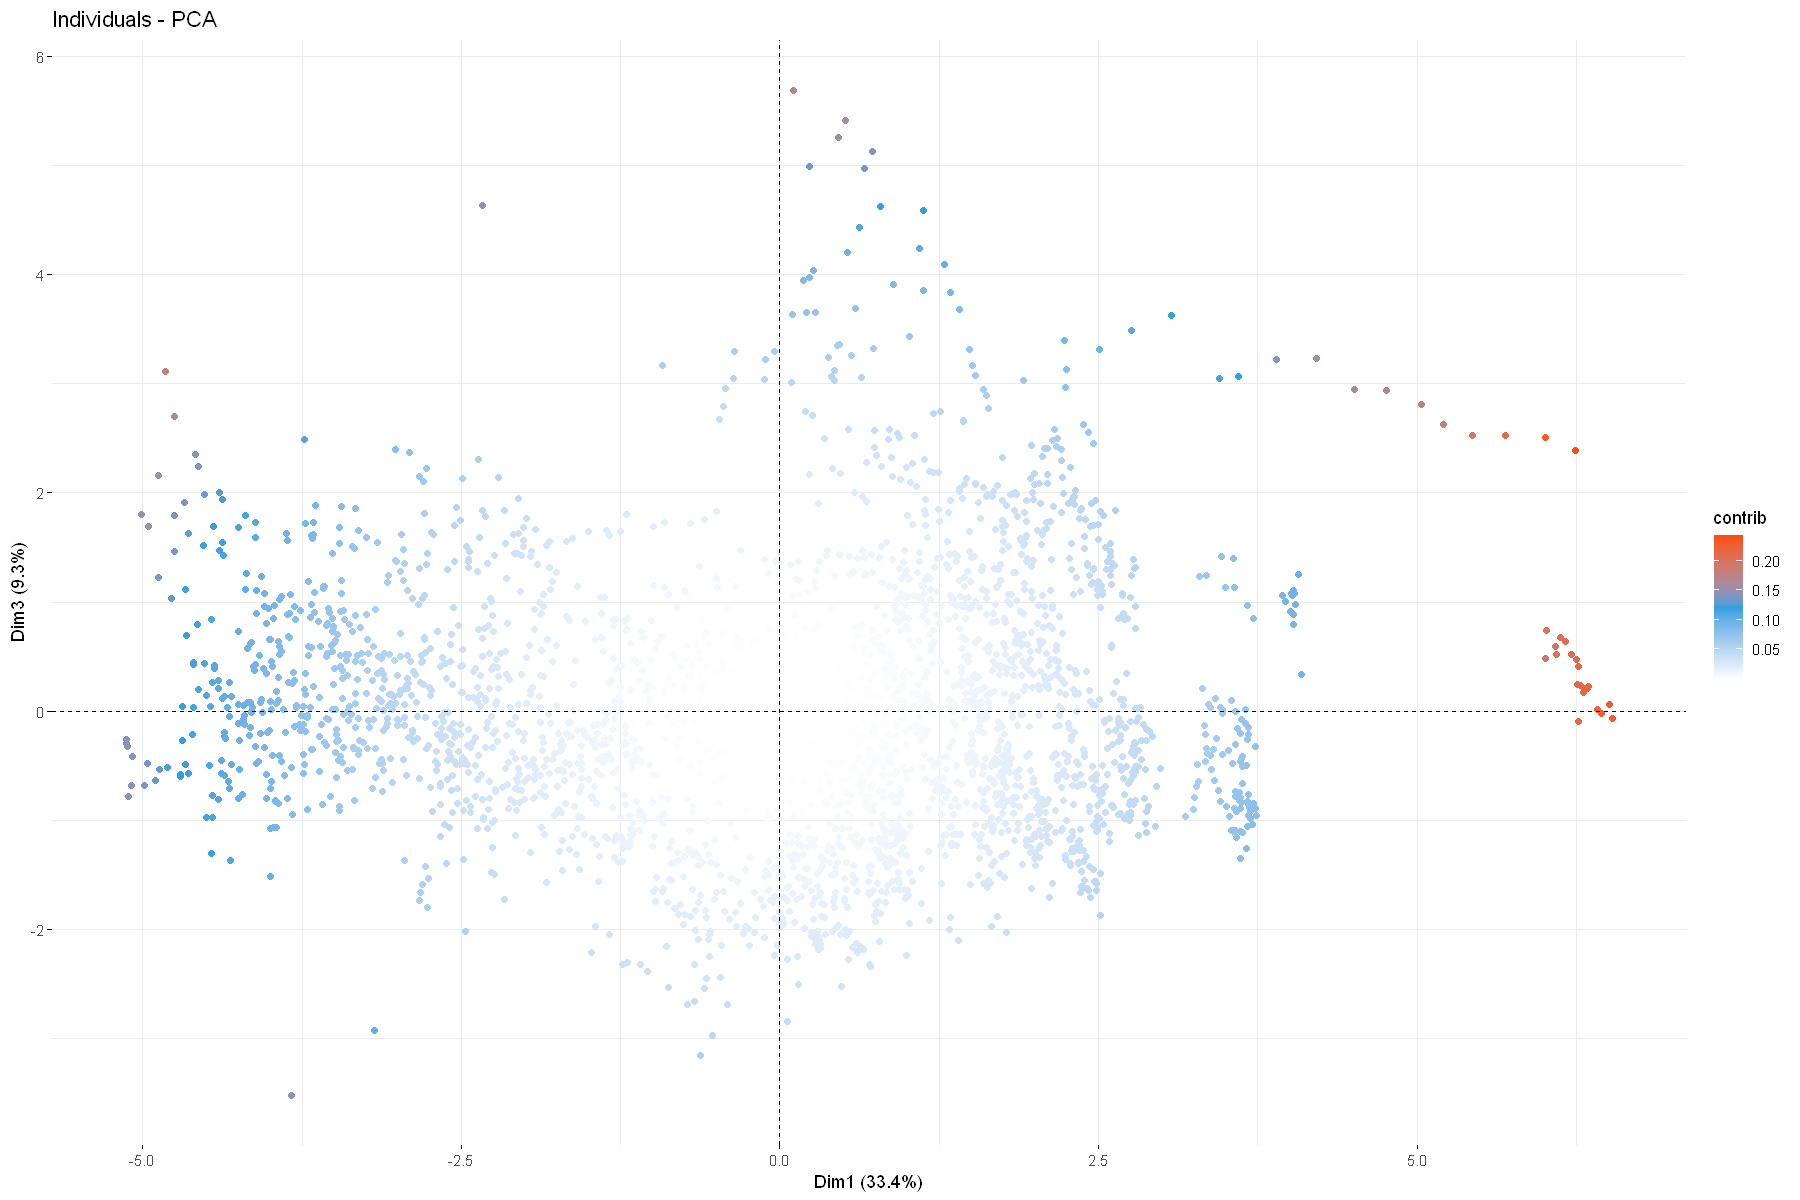

In [500]:
fviz_pca_var(acp)
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp,axes=c(1,3))
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))

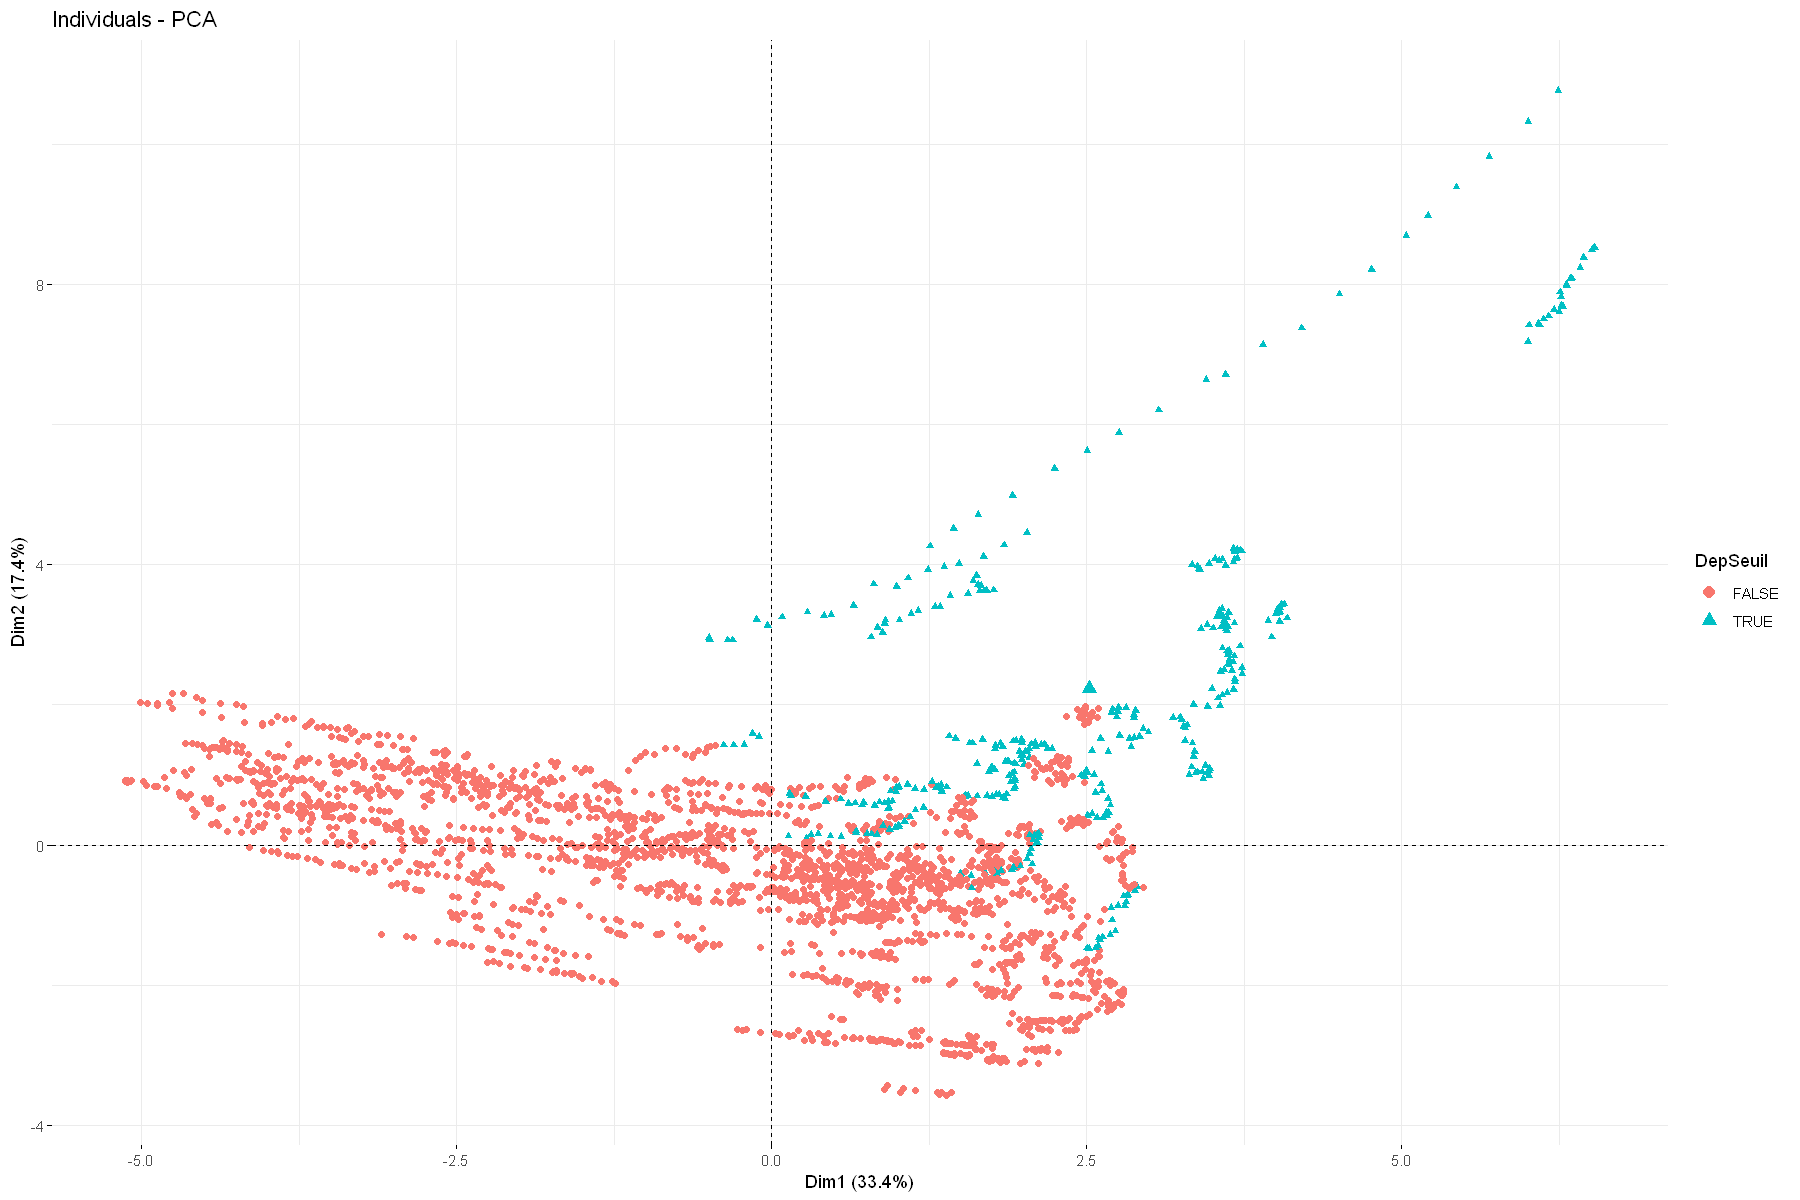

In [501]:
fviz_pca_ind(acp, label="none", habillage=1)